In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#IMPORTS
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from src.data.make_dataset import *
from src.data.modal_data import *

In [3]:
# GET THE DATA
package_folder = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
data_folder = os.path.join(package_folder, 'data')
data_folder

location = 'nw2'
turbine = 'c02'

In [4]:
turbine_data = get_turbine_data(data_folder, location, turbine)
mpe_ss_data = get_mpe_data(turbine_data, 'SS', location, turbine)
mpe_fa_data = get_mpe_data(turbine_data, 'FA', location, turbine)


c:\Users\Max\Documents\OWI_LAB\Code\DCE_EOVnorm\dce_eov_normalisation\data\raw\nw2\nw2c02.parquet


In [5]:
from src.data.harmonics import *
harmonics_data = harmonics(turbine_data['mean_NW2_C02_rpm'], [1,3,6, 9])

In [6]:
mpe_ss_data.to_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'mpe_ss_data.parquet'))
mpe_fa_data.to_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'mpe_fa_data.parquet'))
harmonics_data.to_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'harmonics_data.parquet'))
turbine_data.to_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'turbine_data.parquet'))

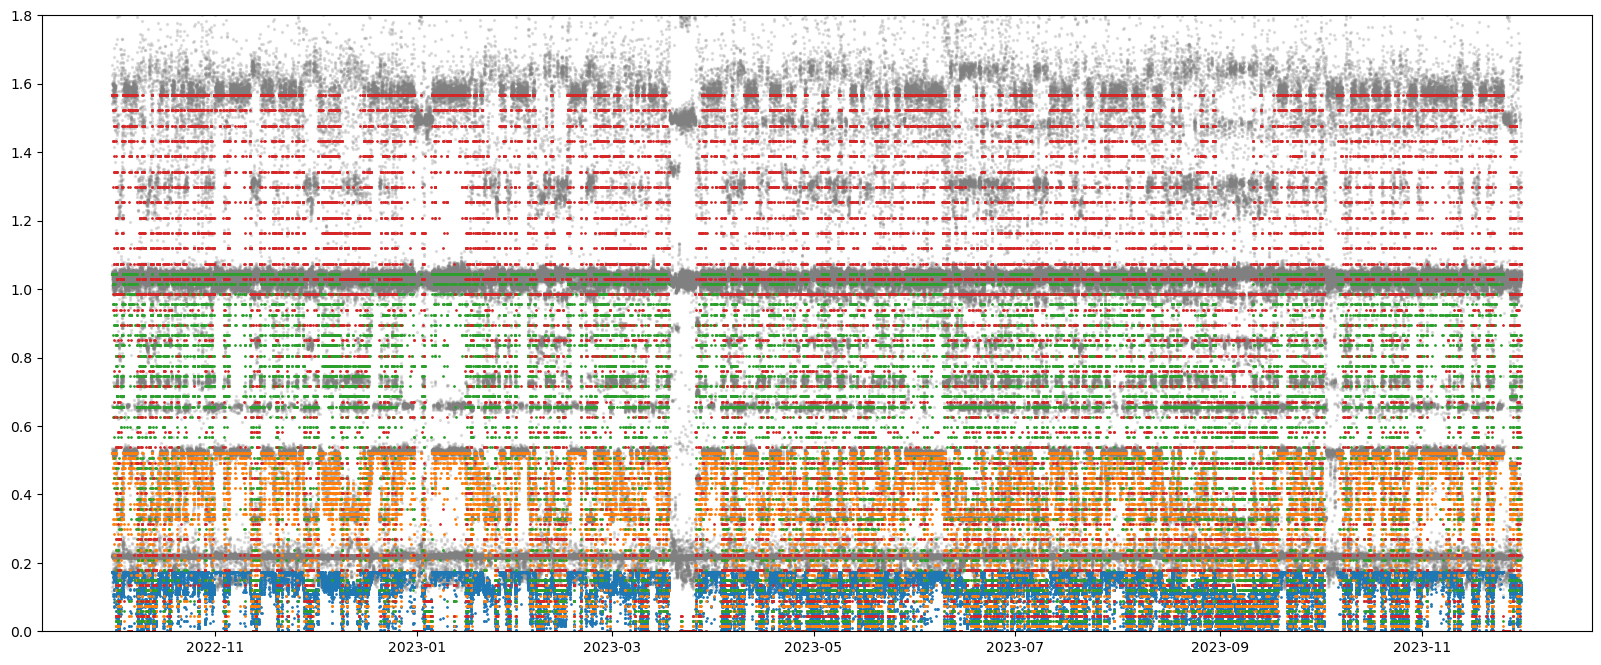

In [7]:
plt.figure(figsize=(20,8))    
plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=2, alpha=0.2, color='grey')
for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data.index, harmonics_data[harmonic], s=1, label=harmonic, alpha=1.0)

plt.ylim(0,1.8)
plt.show()
plt.close()

In [13]:
mpe_ss_data

algorithm  mean_damping  mean_frequency  size  \
timestamp                                                                 
2022-10-01 00:00:00+00:00      lscf      5.747665        0.227571    41   
2022-10-01 00:00:00+00:00      lscf      5.340127        0.532068    25   
2022-10-01 00:00:00+00:00      lscf      1.099526        0.656005    30   
2022-10-01 00:00:00+00:00      lscf      1.488033        1.032248    29   
2022-10-01 00:00:00+00:00      lscf      2.568697        1.070442    29   
...                             ...           ...             ...   ...   
2023-12-01 00:00:00+00:00      lscf      0.175960        3.462845    16   
2023-12-01 00:00:00+00:00      lscf      0.197214        3.493802    39   
2023-12-01 00:00:00+00:00      lscf      1.578439        4.258903    30   
2023-12-01 00:00:00+00:00      lscf      0.905720        4.298355    41   
2023-12-01 00:00:00+00:00      lscf      2.146872        4.905014    19   

                           std_damping  std_frequency  
timestamp                                              
2022-10-01 00:00:00+00:00     0.507349       0.002563  
2022-10-01 00:00:00+00:00     0.286921       0.002534  
2022-10-01 00:00:00+00:00     0.378772       0.001784  
2022-10-01 00:00:00+00:00     0.157338       0.001313  
2022-10-01 00:00:00+00:00     0.196902       0.001873  
...                                ...            ...  
2023-12-01 00:00:00+00:00     0.121096       0.003771  
2023-12-01 00:00:00+00:00     0.112294       0.002462  
2023-12-01 00:00:00+00:00     0.158677       0.008013  
2023-12-01 00:00:00+00:00     0.043038       0.001663  
2023-12-01 00:00:00+00:00     0.337763       0.005281  

[731216 rows x 6 columns]

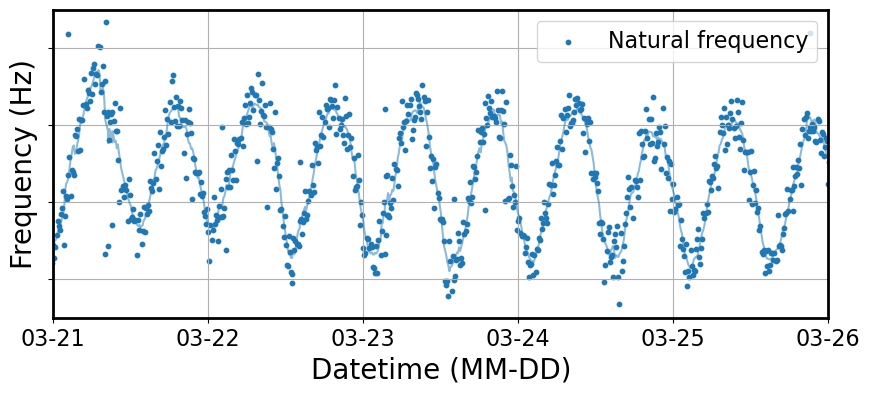

In [44]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Set default font size
plt.rcParams.update({'font.size': 16})

min_freq = 1.03
max_freq = 1.11

start_plot = datetime.datetime(2023, 3, 20, tzinfo=datetime.timezone.utc)
end_plot = datetime.datetime(2023, 3, 27, tzinfo=datetime.timezone.utc)

mpe_data_plot = mpe_fa_data.loc[start_plot:end_plot]

mpe_data_plot = mpe_data_plot[mpe_data_plot['mean_frequency'] < max_freq]
mpe_data_plot = mpe_data_plot[mpe_data_plot['mean_frequency'] > min_freq]

# Calculate moving average
window_size = 10  # You can adjust the window size as needed
mpe_data_plot['centered_moving_average'] = mpe_data_plot['mean_frequency'].rolling(window=window_size, center=True).mean()
fig, ax = plt.subplots(figsize=(10,4))



plt.scatter(mpe_data_plot.index, mpe_data_plot['mean_frequency'], s=10, alpha=1.0, color='tab:blue', label='Natural frequency')
plt.plot(mpe_data_plot.index, mpe_data_plot['centered_moving_average'], color='tab:blue', alpha=0.5,)


colors = ['tab:green', 'tab:red', 'tab:purple', 'tab:brown']
i = 0
plt.xlim(start_plot+datetime.timedelta(days=1), end_plot-datetime.timedelta(days=1))
plt.ylim(min_freq, max_freq)
plt.legend(loc='upper right', fontsize=16)
plt.xlabel('Datetime (MM-DD)', fontsize=20)
plt.ylabel('Frequency (Hz)', fontsize=20)
ax.set_yticklabels([])

# Format x-tick labels to MM-DD
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


# Make the border of the plot thicker
for spine in ax.spines.values():
    spine.set_linewidth(2)

plt.grid()
plt.show()
plt.close()

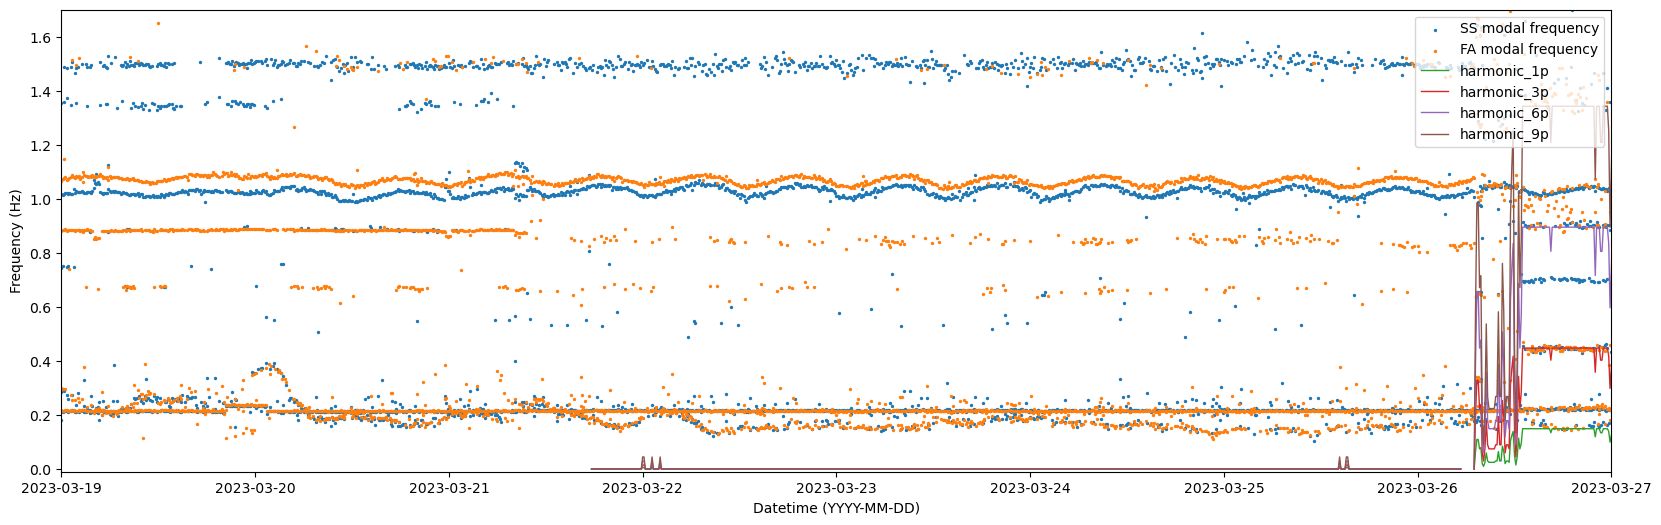

In [8]:
plt.figure(figsize=(20,6))    
plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=2, alpha=1.0, color='tab:blue', label='SS modal frequency')
plt.scatter(mpe_fa_data.index, mpe_fa_data['mean_frequency'], s=2, alpha=1.0, color='tab:orange', label='FA modal frequency')

colors = ['tab:green', 'tab:red', 'tab:purple', 'tab:brown']
i = 0
for harmonic in harmonics_data.columns:
    plt.plot(harmonics_data.index, harmonics_data[harmonic], label=harmonic, alpha=1.0, linewidth=1.0, color=colors[i])
    i += 1
plt.xlim(datetime.datetime(2023, 3, 19), datetime.datetime(2023, 3, 27))
plt.ylim(-0.01,1.7)
plt.legend(loc='upper right')
plt.xlabel('Datetime (YYYY-MM-DD)')
plt.ylabel('Frequency (Hz)')
plt.show()
plt.close()

KeyboardInterrupt: 

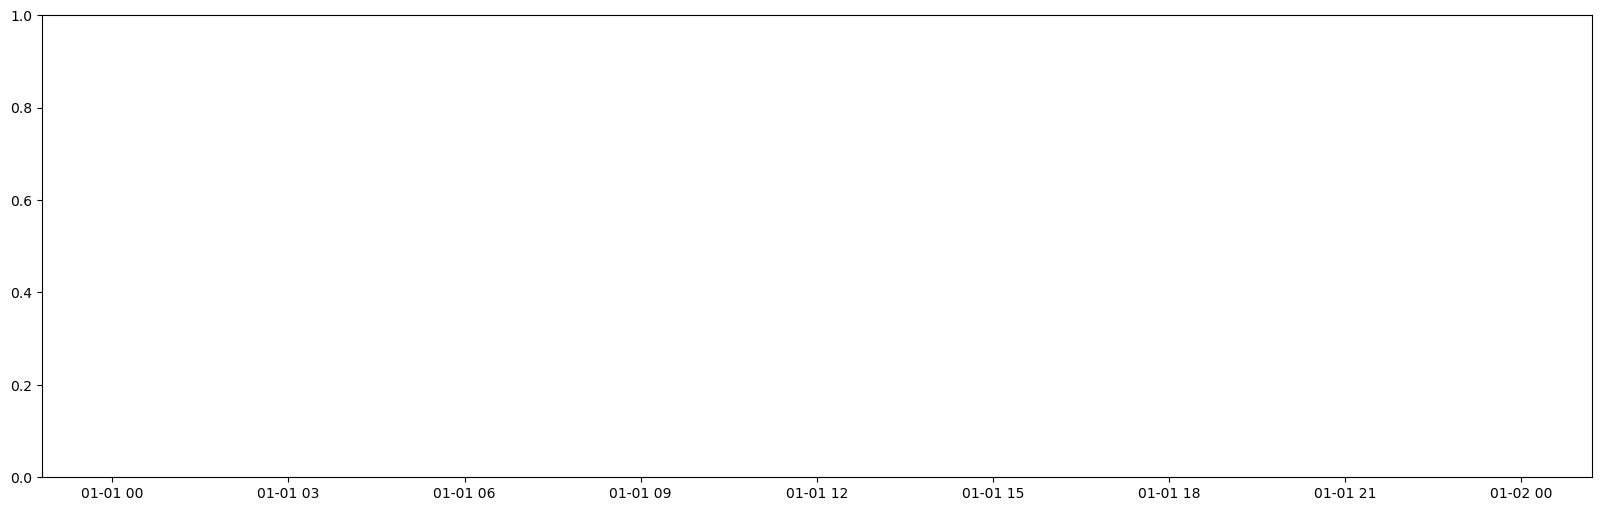

In [9]:
plt.figure(figsize=(20,6))    
plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=2, alpha=1.0, color='tab:blue', label='SS modal frequency')
plt.scatter(mpe_fa_data.index, mpe_fa_data['mean_frequency'], s=2, alpha=1.0, color='tab:orange', label='FA modal frequency')

colors = ['tab:green', 'tab:red', 'tab:purple', 'tab:brown']
i = 0
for harmonic in harmonics_data.columns:
    plt.plot(harmonics_data.index, harmonics_data[harmonic], label=harmonic, alpha=1.0, linewidth=1.0, color=colors[i])
    i += 1
plt.xlim(datetime.datetime(2023, 1, 6), datetime.datetime(2023, 1, 13))
plt.ylim(-0.01,1.8)
plt.legend(loc='upper right')
plt.xlabel('Datetime (YYYY-MM-DD)')
plt.ylabel('Frequency (Hz)')
plt.show()
plt.close()

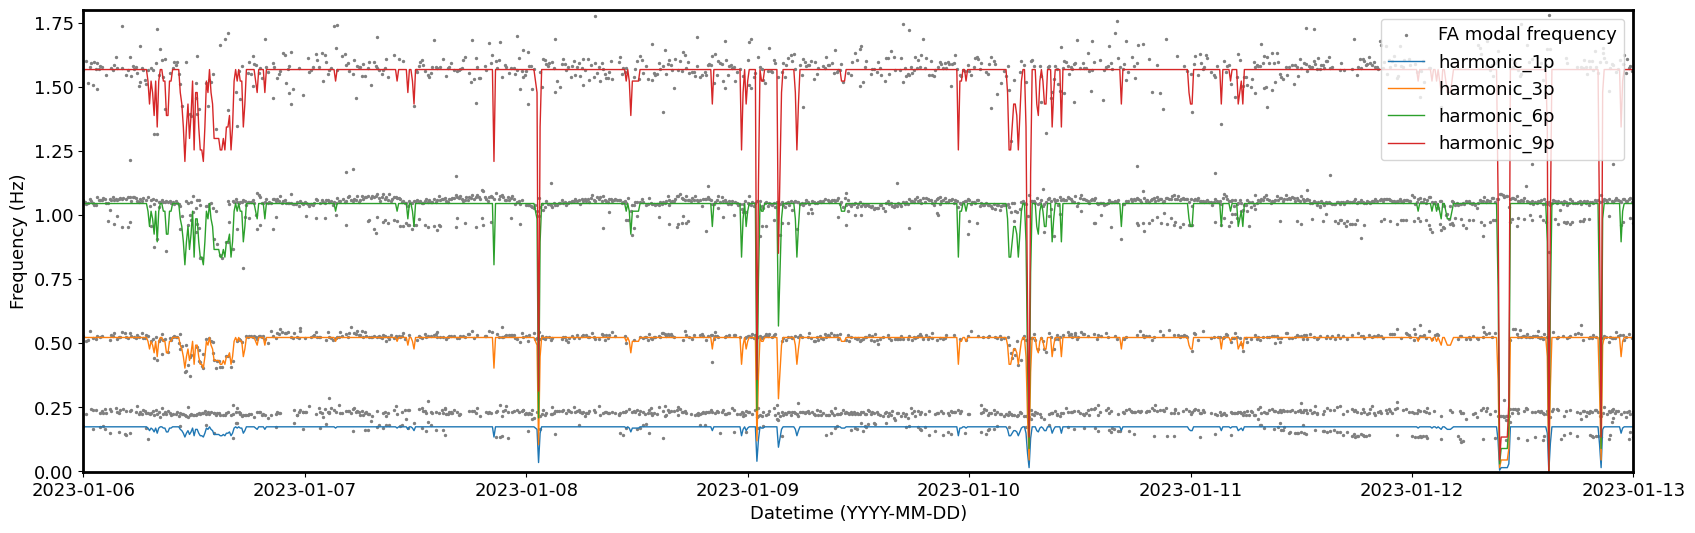

In [31]:
plt.figure(figsize=(20,6))    
plt.scatter(mpe_fa_data.index, mpe_fa_data['mean_frequency'], s=2, alpha=1.0, color='grey', label='FA modal frequency')
for harmonic in harmonics_data.columns:
    plt.plot(harmonics_data.index, harmonics_data[harmonic], label=harmonic, alpha=1.0, linewidth=1.0)
plt.xlim(datetime.datetime(2023, 1, 6), datetime.datetime(2023, 1, 13))
plt.ylim(-0.001,1.8)
plt.legend(loc='upper right')
plt.xlabel('Datetime (YYYY-MM-DD)')
plt.ylabel('Frequency (Hz)')
plt.show()
clt.close()

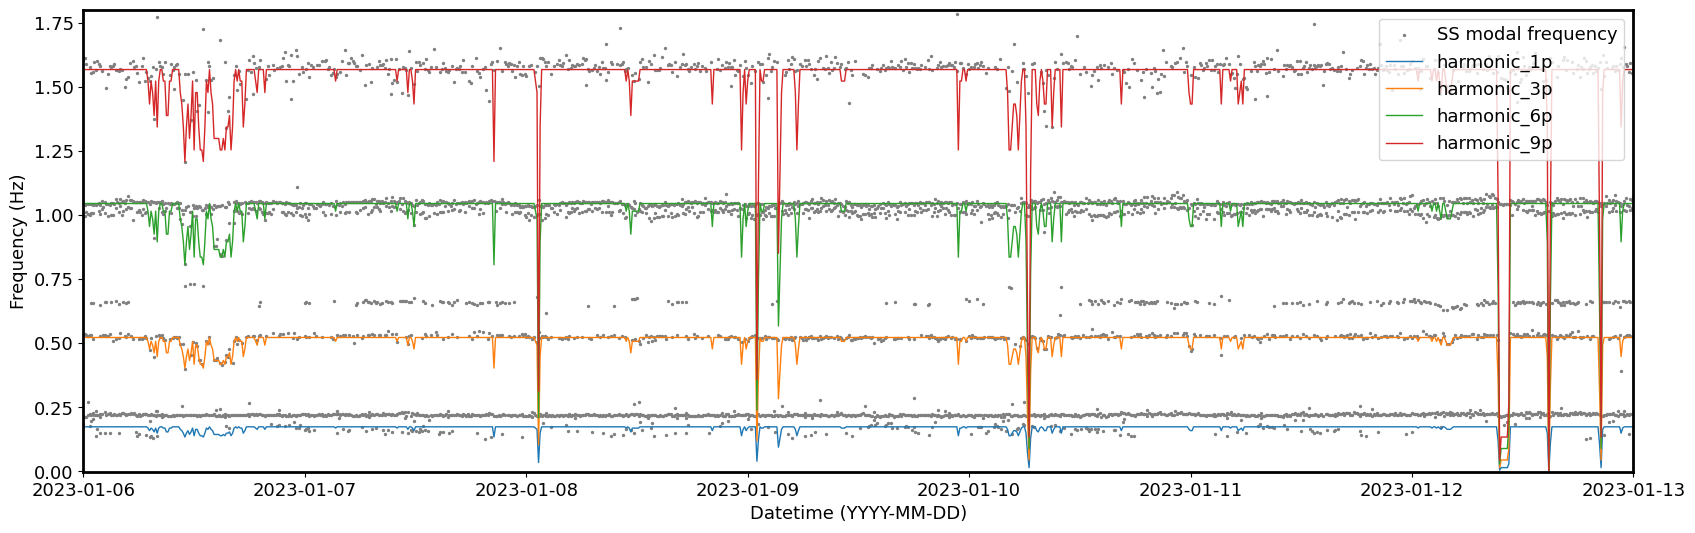

In [27]:
plt.figure(figsize=(20,6))    
plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=2, alpha=1.0, color='grey', label='SS modal frequency')
for harmonic in harmonics_data.columns:
    plt.plot(harmonics_data.index, harmonics_data[harmonic], label=harmonic, alpha=1.0, linewidth=1.0)
plt.xlim(datetime.datetime(2023, 1, 6), datetime.datetime(2023, 1, 13))
plt.ylim(-0.001,1.8)
plt.legend(loc='upper right')
plt.xlabel('Datetime (YYYY-MM-DD)')
plt.ylabel('Frequency (Hz)')
plt.show()
plt.close()

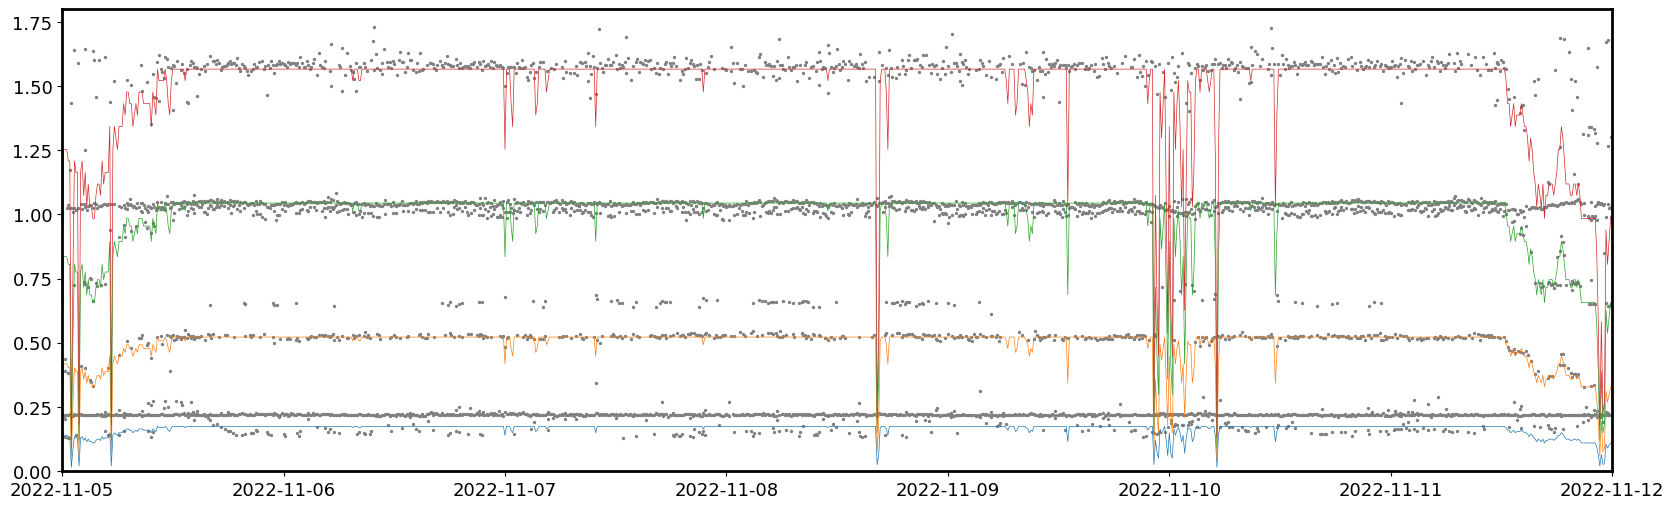

In [23]:
plt.figure(figsize=(20,6))    
plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=2, alpha=1.0, color='grey')
for harmonic in harmonics_data.columns:
    plt.plot(harmonics_data.index, harmonics_data[harmonic], label=harmonic, alpha=1.0, linewidth=1.0)
plt.xlim(datetime.datetime(2022, 11, 5), datetime.datetime(2022, 11, 12))
plt.ylim(-0.001,1.8)
plt.show()
plt.close()

In [7]:
import matplotlib
#matplotlib.rc('text', usetex=True)
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['axes.unicode_minus'] = False

C:\Users\Max\AppData\Local\Temp\ipykernel_27944\1715195689.py:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


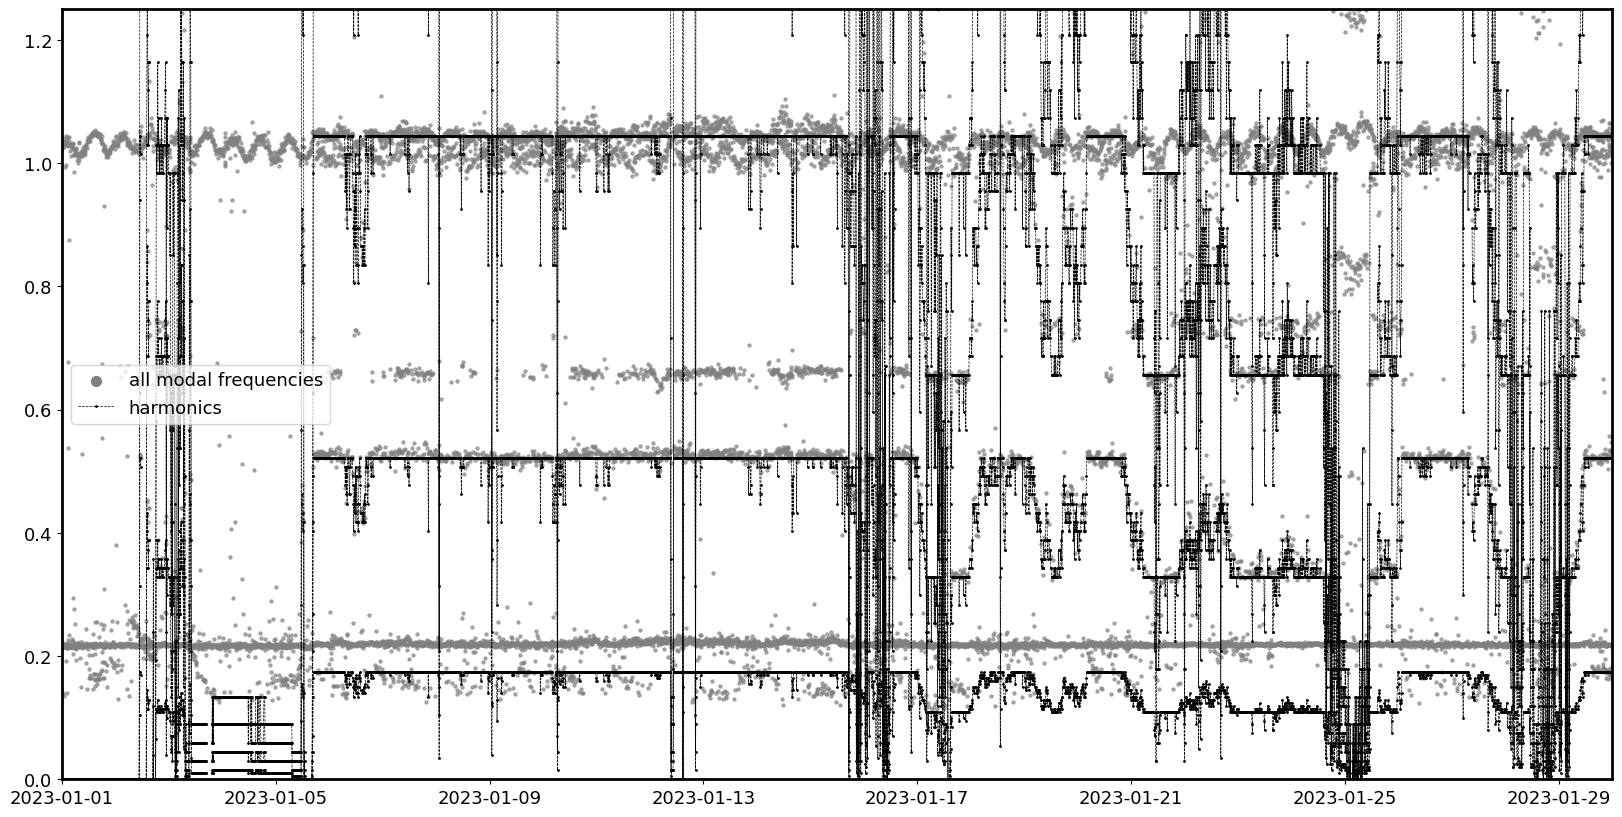

In [8]:
plt.figure(figsize=(20,10))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=5, alpha=0.6, color='grey')
for harmonic in harmonics_data.columns:
    plt.plot(harmonics_data.index, harmonics_data[harmonic], alpha=1.0, color='k', marker='o', markersize=1, linewidth=0.5, linestyle='--')
plt.xlim(datetime.datetime(2023, 1, 1), datetime.datetime(2023, 1, 30))
plt.ylim(0, 1.25)
legend = plt.legend(loc='center left', labels=['all modal frequencies', 'harmonics'])
for handles in legend.legendHandles:
    try:
        handles.set_sizes([50])
        handles.set_alpha(1.0)
    except:
        pass
    

plt.show()
plt.close()

In [14]:
plt.figure(figsize=(20,10))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=5, alpha=0.6, color='grey')
for harmonic in harmonics_data.columns:
    plt.plot(harmonics_data.index, harmonics_data[harmonic], alpha=1.0, color='k', marker='o', markersize=1, linewidth=0.5, linestyle='--')
plt.xlim(datetime.datetime(2023, 3, 20), datetime.datetime(2023, 4, 1))
plt.ylim(0, 1.25)
legend = plt.legend(loc='center left', labels=['all modal frequencies', 'harmonics'])
for handles in legend.legendHandles:
    try:
        handles.set_sizes([50])
        handles.set_alpha(1.0)
    except:
        pass
    

plt.show()
plt.close()

C:\Users\Max\AppData\Local\Temp\ipykernel_27944\3612569282.py:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


In [9]:
plt.figure(figsize=(20,10))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=5, alpha=1.0, color='grey')
for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data.index, harmonics_data[harmonic], s=2, alpha=0.2, color='k', marker = 's')
plt.xlim(datetime.datetime(2023, 1, 1), datetime.datetime(2023, 1, 30))
plt.ylim(0, 1.25)
legend = plt.legend(loc='center left', labels=['all modal frequencies', 'harmonics'])
for handles in legend.legendHandles:
    handles.set_sizes([50])
    handles.set_alpha(1.0)

plt.show()
plt.close()

C:\Users\Max\AppData\Local\Temp\ipykernel_27944\380611190.py:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


C:\Users\Max\AppData\Local\Temp\ipykernel_27944\359845943.py:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


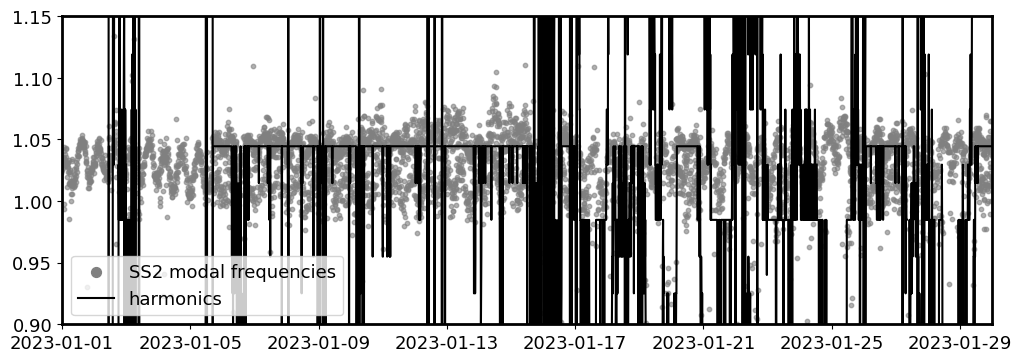

In [10]:
plt.figure(figsize=(12,4))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=10, alpha=0.6, color='grey')
for harmonic in harmonics_data.columns:
    plt.plot(harmonics_data.index, harmonics_data[harmonic],alpha=1.0, color='k')
plt.xlim(datetime.datetime(2023, 1, 1), datetime.datetime(2023, 1, 30))
plt.ylim(0.9, 1.15)
legend = plt.legend(loc='lower left', labels=['SS2 modal frequencies', 'harmonics'])
for handles in legend.legendHandles:
    try:
        handles.set_sizes([50])
    except:
        pass
    handles.set_alpha(1.0)

plt.show()
plt.close()

C:\Users\Max\AppData\Local\Temp\ipykernel_27944\3092553657.py:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


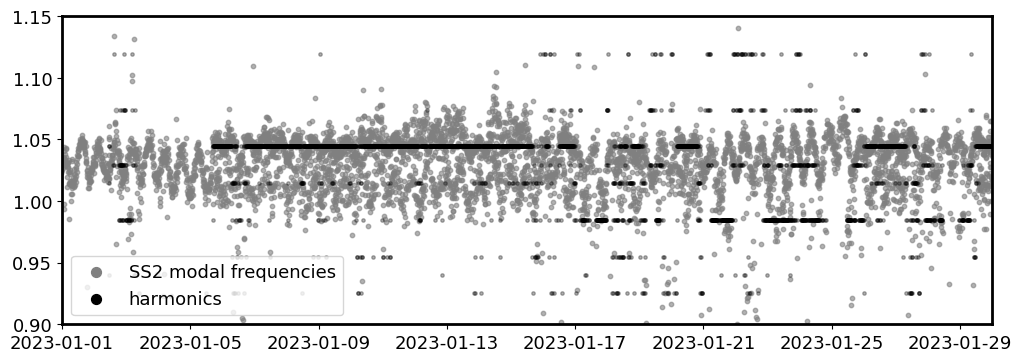

C:\Users\Max\AppData\Local\Temp\ipykernel_27944\3092553657.py:24: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


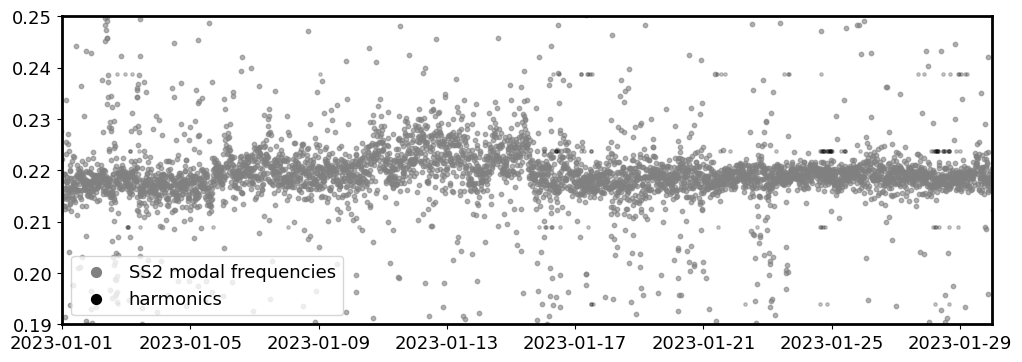

In [11]:
plt.figure(figsize=(12,4))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=10, alpha=0.6, color='grey')
for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data.index, harmonics_data[harmonic], s=6, alpha=0.3, color='k')
plt.xlim(datetime.datetime(2023, 1, 1), datetime.datetime(2023, 1, 30))
plt.ylim(0.9, 1.15)
legend = plt.legend(loc='lower left', labels=['SS2 modal frequencies', 'harmonics'])
for handles in legend.legendHandles:
    handles.set_sizes([50])
    handles.set_alpha(1.0)

plt.show()
plt.close()

plt.figure(figsize=(12,4))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=10, alpha=0.6, color='grey')
for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data.index, harmonics_data[harmonic], s=6, alpha=0.2, color='k')
plt.xlim(datetime.datetime(2023, 1, 1), datetime.datetime(2023, 1, 30))
plt.ylim(0.19, 0.25)
legend = plt.legend(loc='lower left', labels=['SS2 modal frequencies', 'harmonics'])
for handles in legend.legendHandles:
    handles.set_sizes([50])
    handles.set_alpha(1.0)

plt.show()
plt.close()

In [12]:
rpm_split = 6
low_rpm_timestamps = turbine_data[turbine_data['mean_NW2_C02_rpm'] < rpm_split].index
mpe_ss_data_lowrpm = mpe_ss_data[mpe_ss_data.index.isin(low_rpm_timestamps)]

C:\Users\Max\AppData\Local\Temp\ipykernel_27944\610727200.py:11: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


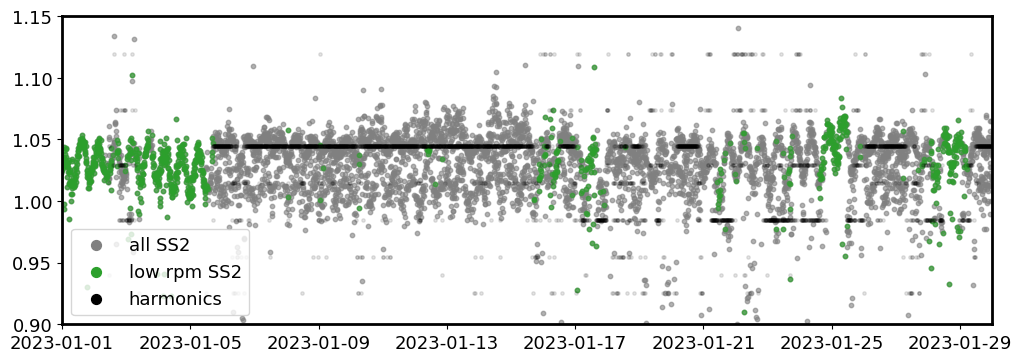

In [13]:
plt.figure(figsize=(12,4))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=10, alpha=0.6, color='grey')
plt.scatter(mpe_ss_data_lowrpm.index, mpe_ss_data_lowrpm['mean_frequency'], s=10, alpha=0.6, color='tab:green')

for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data.index, harmonics_data[harmonic], s=6, alpha=0.1, color='k')
plt.xlim(datetime.datetime(2023, 1, 1), datetime.datetime(2023, 1, 30))
plt.ylim(0.9, 1.15)
legend = plt.legend(loc='lower left', labels=['all SS2', 'low rpm SS2', 'harmonics'])
for handles in legend.legendHandles:
    handles.set_sizes([50])
    handles.set_alpha(1.0)

plt.show()
plt.close()